Epoch 10/100, Loss: 0.2084
Epoch 20/100, Loss: 0.1700
Epoch 30/100, Loss: 0.1414
Epoch 40/100, Loss: 0.1238
Epoch 50/100, Loss: 0.1028
Epoch 60/100, Loss: 0.0954
Epoch 70/100, Loss: 0.0830
Epoch 80/100, Loss: 0.0757
Epoch 90/100, Loss: 0.0887
Epoch 100/100, Loss: 0.0606

MSE: 0.0623
RMSE: 0.2496
R² Score: 0.7041


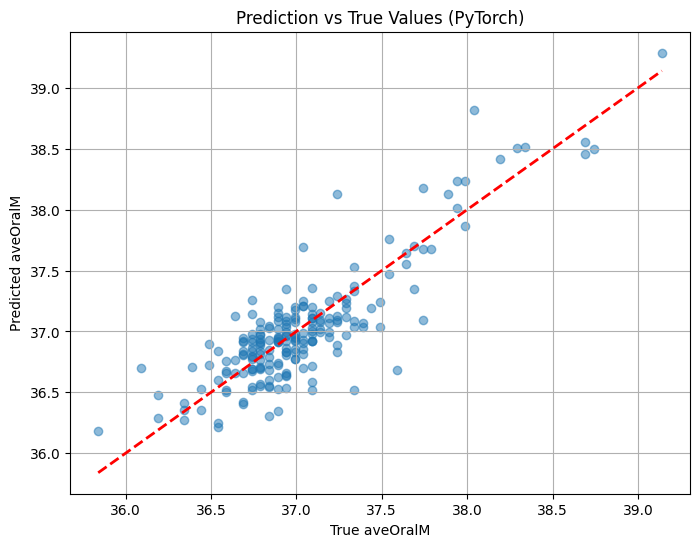

In [ ]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === 2. Load Dataset ===
data = pd.read_csv(r"infrared.csv")

# === 3. Define Target ===
target = 'aveOralM'

# === 4. Separate Features and Target ===
X = data.drop(columns=[target])
y = data[target].values.reshape(-1, 1)

# === 5. Preprocessing Pipelines ===
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# === 6. Scale Target ===
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# === 7. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

# === 8. Convert to Tensors and Create Dataloaders ===
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# === 9. Define Standard Model ===
model_pt = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# === 10. Define Loss and Optimizer ===
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_pt.parameters(), lr=0.001)

# === 11. Train Model ===
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model_pt.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_pt(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# === 12. Evaluate Model ===
model_pt.eval()
with torch.no_grad():
    y_pred_scaled = model_pt(X_test_tensor).numpy()

# Inverse scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy())

# === 13. Metrics ===
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"\nMSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# === 14. Plot Prediction vs True ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', linewidth=2)
plt.xlabel("True aveOralM")
plt.ylabel("Predicted aveOralM")
plt.title("Prediction vs True Values (PyTorch)")
plt.grid(True)
plt.show()


Epoch 1/100


C:\Users\muham\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6260 - val_loss: 0.3429
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3188 - val_loss: 0.2689
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2604 - val_loss: 0.2894
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2547 - val_loss: 0.2960
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2183 - val_loss: 0.2932
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2060 - val_loss: 0.2836
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2753 - val_loss: 0.2782
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2452 - val_loss: 0.2818
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2037 - val_loss: 0.3027
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1938 - val_loss: 0.2826
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2341 - val_loss: 0.2921
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1954 - val_lo

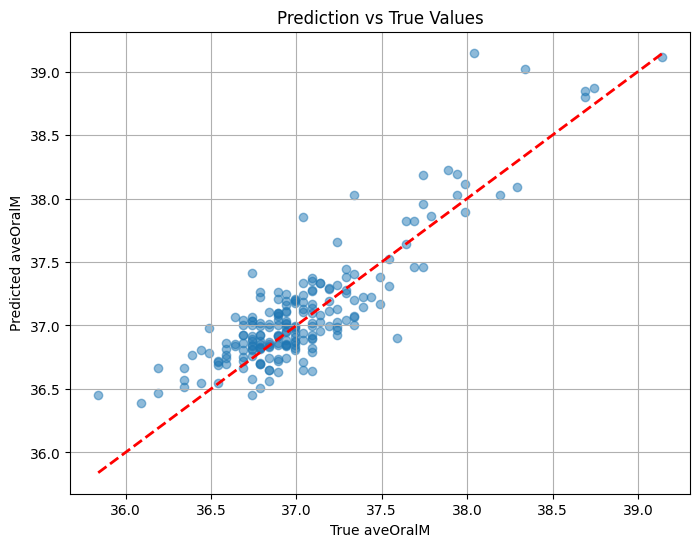

In [22]:
# === 1. Import Libraries ===
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === 2. Load Dataset ===
data = pd.read_csv(r"D:\Software\Deep-Learning\Week 1\Dataset\infrared.csv")

# === 3. Define Target ===
target = 'aveOralM'

# === 4. Separate Features and Target ===
X = data.drop(columns=[target])
y = data[target].values.reshape(-1, 1)

# === 5. Preprocessing Pipelines ===
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# === 6. Scale Target ===
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# === 7. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

# === 8. Build Standard Sequential Model ===
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# === 9. Compile the Model ===
model.compile(optimizer='adam', loss='mse')

# === 10. Callbacks ===
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# === 11. Train the Model ===
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# === 12. Evaluate Model ===
loss = model.evaluate(X_test, y_test)
print(f"\nTest Loss (MSE): {loss:.4f}")

# === 13. Predict and Calculate Metrics ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# === 14. Plot Prediction vs Actual ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()], 'r--', linewidth=2)
plt.xlabel("True aveOralM")
plt.ylabel("Predicted aveOralM")
plt.title("Prediction vs True Values")
plt.grid(True)
plt.show()


In [ ]:
import random

def compare_sample_prediction(X_test, y_test, model, model_pt, scaler_y):
    # 1. Pick a random sample index
    sample_idx = random.randint(0, len(X_test) - 1)
    sample_input = X_test[sample_idx].reshape(1, -1)

    # 2. TensorFlow Prediction
    tf_pred_scaled = model.predict(sample_input)
    tf_pred = scaler_y.inverse_transform(tf_pred_scaled)
    true_value = scaler_y.inverse_transform(y_test[sample_idx].reshape(1, -1))

    # 3. PyTorch Prediction
    model_pt.eval()
    with torch.no_grad():
        sample_tensor = torch.tensor(sample_input, dtype=torch.float32)
        pt_pred_scaled = model_pt(sample_tensor).numpy()
        pt_pred = scaler_y.inverse_transform(pt_pred_scaled)

    # 4. Print Comparison
    print(f"\n Sample index: {sample_idx}")
    print(f" Actual aveOralM      : {true_value[0][0]:.4f}")
    print(f" TensorFlow Prediction: {tf_pred[0][0]:.4f}")
    print(f" PyTorch Prediction   : {pt_pred[0][0]:.4f}")

# Call this anytime
compare_sample_prediction(X_test, y_test, model, model_pt, scaler_y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

 Sample index: 189
 Actual aveOralM      : 37.0900
 TensorFlow Prediction: 37.2709
 PyTorch Prediction   : 37.3564


: 

# ANALISIS HASIL DARI REGRESSION

**Hasil dari PyTorch:**

- **MSE**: 0.0623
- **RMSE**: 0.2496
- **R² Score**: 0.7041

**Hasil dari Tensorflow:**

- **MSE**: 0.0601
- **RMSE**: 0.2452
- **R² Score**: 0.7144

**Hasil dari Prediction:**
- **Actual aveOralM**: 37.0900
- **TensorFlow Prediction**: 37.2709
- **PyTorch Prediction** : 37.3564


Dari keduanya sangat mendekati namun Tensorflow memiliki performa sedikit lebih baik di MSE dan RMSE tetapi PyTorch menang di R². Untuk hasil prediction, kedua sangat dekat dan kadang saling menyaingi.



# BENTUK PERSAMAAN DARI MSE/RMSE/$R^2$
Mean Squared Error (MSE) 
-
Mean Squared Error (MSE) mengukur rata-rata kuadrat kesalahan (error) antara nilai yang diprediksi dengan nilai aktual. MSE memberikan gambaran seberapa besar nilai yang diprediksi berbeda dari nilai aktual.

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Keterangan:**

- \($ n $\)         : Jumlah data
- \($ y_i $\)       : Nilai aktual
- \($ \hat{y}_i $)  : Nilai prediksi


Root Mean Squared Error (RMSE)
-
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. RMSE memberikan ukuran kesalahan dalam satuan yang sama dengan data asli, sehingga lebih mudah diinterpretasikan.

$$
RMSE = \sqrt{MSE}
$$

Atau dengan substitusi,

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

**Keterangan:**

- \($ n $\)         : Jumlah data
- \($ y_i $\)       : Nilai aktual
- \($ \hat{y}_i $)  : Nilai prediksi

Koefisien Determinasi (R²)
-
Koefisien determinasi (R²) mengukur proporsi variabilitas dalam nilai aktual yang dapat dijelaskan oleh model. Nilai R² berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Dengan,

$$
SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

$$
SS_{tot} = \sum_{i=1}^{n} (y_i - \overline{y})^2
$$

**Keterangan:**
- \($ SS_{res} $\): Jumlah kuadrat residu (sum of squared residuals)
- \($ SS_{tot} $\): Jumlah kuadrat total (sum of squared total)
- \($ \overline{y} $\): Rata-rata nilai aktual
